# Báo cáo Project
Lớp TTNT-156272156272, Nhóm G20

## 1. Thông tin chung

### Thành viên
- Nguyễn Quỳnh Anh 20225785
- Nguyễn Bùi Việt Linh 20225733
- Đỗ Tiến Đạt 20225700
- Hoàng Sĩ Anh Minh 20225883

### Lịch thực hiện
- W25: Đăng ký nhóm 
- W26: Đề xuất project (1/3)
- W31: Báo cáo tiến độ giữa kỳ (5/4)
- W37: Hoàn thành và gửi báo cáo project (17/5)
- W38-40: Trình bày project, Q&A

## 2. Đề xuất project (W26)

### Bài toán
SO SÁNH CÁC THUẬT TOÁN TÌM ĐƯỜNG ĐI TRONG MÊ CUNG


## Phương pháp giải quyết bài toán  

Để tìm đường đi trong mê cung, nhóm chúng em sẽ so sánh và phân tích hiệu suất của các thuật toán giải mê cung phổ biến. Chúng em sẽ khởi tạo một mê cung ngẫu nhiên luôn có đường đi từ điểm đầu đến điểm cuối sử dụng thuật toán **Backtracking**, sau đó sử dụng các thuật toán phổ biến để tìm đường đi trong mê cung. Các thuật toán được sử dụng bao gồm:  

- **Thuật toán DFS (Depth-First Search)**: Duyệt theo chiều sâu, ưu tiên đi sâu vào các nhánh trước khi quay lại.  
- **Thuật toán BFS (Breadth-First Search)**: Duyệt theo chiều rộng, tìm đường đi ngắn nhất bằng cách mở rộng từ điểm xuất phát theo từng lớp.  
- **Thuật toán A\***: Kết hợp Dijkstra với heuristic để tăng tốc độ tìm kiếm bằng cách ưu tiên các hướng có khả năng đến đích nhanh hơn.   


Mỗi thuật toán sẽ được đánh giá dựa trên trung bình về thời gian chạy, quãng đường tìm được và lượng ô cần tìm kiếm.

### Phân công

| Công việc | Thành viên đảm nhiệm  |
|-----------------|-----------------|
| Generating maze    | NBV Linh  | 
| Programing DFS   | ĐT Đạt, NQ Anh  | 
| Programing BFS   | HSA Minh, NQ Anh   |
| Programing A*    | NBV Linh, NQ Anh| 
| Project Analysis   | NBV Linh    | 
| Report    | NQ Anh    | 
| Slide   | DT Đạt, HSA Minh    |  

## 4. Cập nhật kết quả cuối kỳ (W37)

### Chương trình
- Phân tích hiệu năng của các thuật toán tạo mê cung và tìm đường đi
- Xây dựng giao diện cho ứng dụng để dễ dàng thay đổi thuật toán cũng như kích thước của mê cung
- Xây dựng hình ảnh động thể hiện thuật toán từng bước



#### Giao diện chương trình:


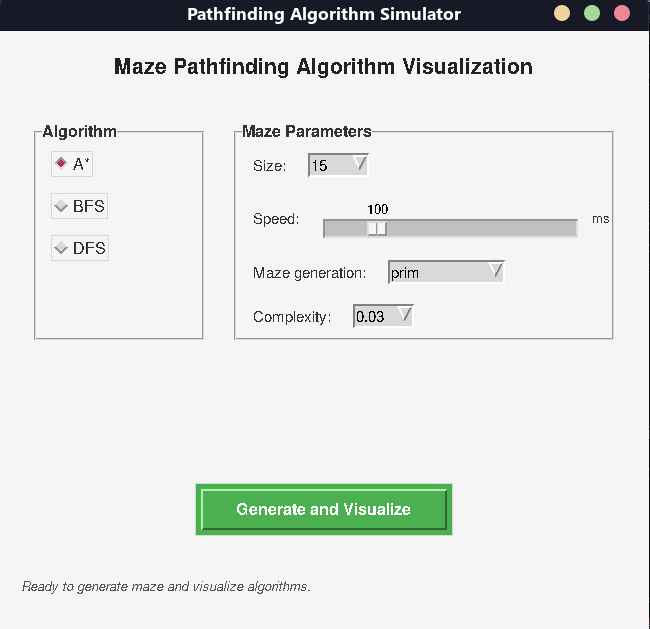

- Nhóm chúng em đã xây dựng giao diện ứng dụng để dễ dàng thao tác trong việc quan sát cách hoạt động của mê cung. Để chạy ứng dụng, chạy file `app.py` trong thu mục dự án.
- Ở cột bên trái, người dùng có thể chọn loại thuật toán trong cột `Algorithm`.
- Ở cột bên phải, người dùng có thể chỉnh sửa các tham số của mê cung:
1. `Size`: Kích thước mê cung
2. `Speed`: Khoảng cách giữa hai frame, càng nhỏ, tốc độ chạy của chương trình càng nhanh.
3. `Maze generation`: Thuật toán sinh mê cung
4. `Complexity`: Chọn xác suất tường bị phá sau khi sinh ra từ thuật toán sinh mê cung, giúp tăng độ phức tạp của mê cung

#### Animation mô tả cách thuật toán hoạt động và tìm được đường đi trong mê cung

<video width="1400" height="800" controls>
  <source src="results/animation_astar.mp4" type="video/mp4">
</video>

### Phân tích, đánh giá kết quả
3 biểu đồ dưới đây biểu diễn thời gian trung bình về thời gian chạy, quảng đường tìm được và lượng ô cần tìm kiếm đối với 4 thuật toán DFS, BFS, A* và Dijktra.

Dữ liệu được lưu trong folder results.

Chạy file data.py để lấy dữ liệu benchmark, sau đó chạy 3 cell dưới đây để hiển thị lần lượt các biểu đồ kết quả.

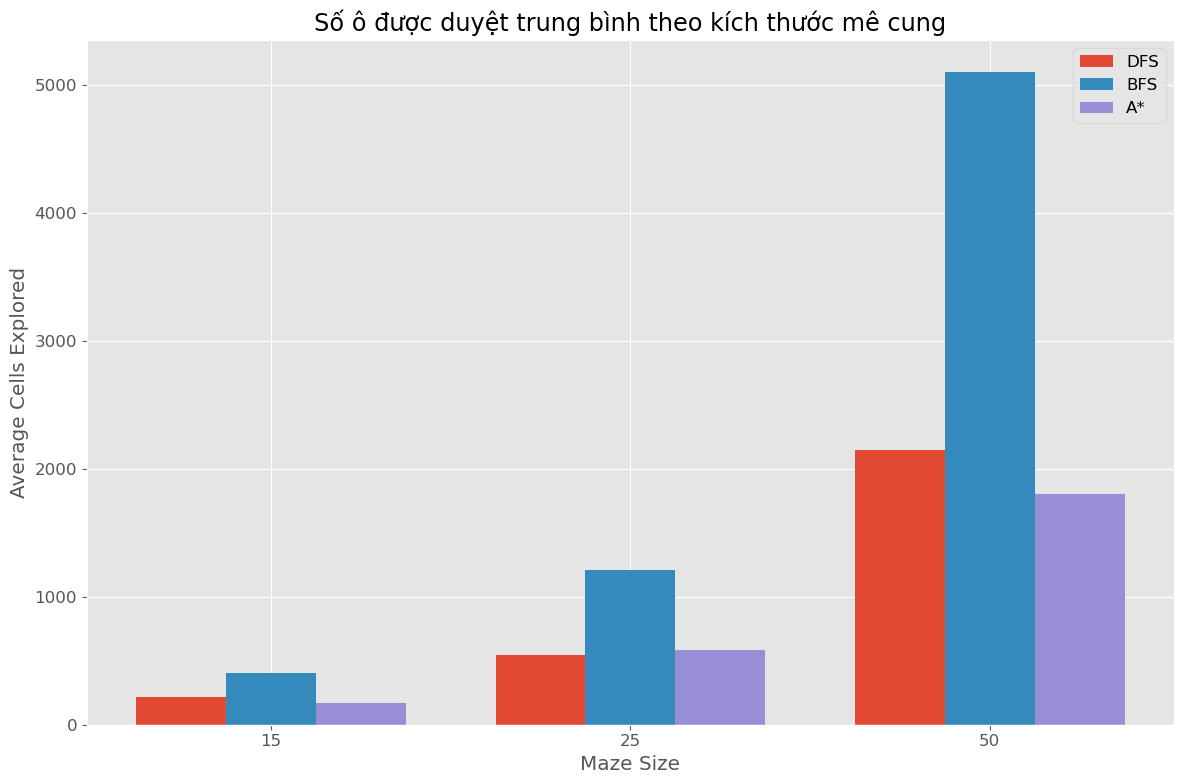

Visualization created and saved to results directory.

Average cells explored by maze size:
   Maze Size  DFS Cells  BFS Cells  A* Cells
0         15      218.6      402.6     169.6
1         25      541.2     1210.8     584.2
2         50     2144.8     5096.4    1806.2


In [3]:
#!/usr/bin/env python3
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configure plot styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def analyze_cells_explored():
    """
    Analyze and visualize the average number of cells explored
    by each algorithm across different maze sizes.
    """
    # Check if the results file exists
    filepath = 'results/cells_explored.csv'
    if not os.path.exists(filepath):
        print(f"Error: File {filepath} not found.")
        print("Please run the benchmarks first using data.py")
        return

    # Read the CSV file
    try:
        # First row contains headers
        df = pd.read_csv(filepath)
        
        # Rename columns for clarity if needed
        if len(df.columns) >= 5:  # Expected number of columns
            df.columns = ['Maze Size', 'Generation Algorithm', 'DFS Cells', 'BFS Cells', 
                          'A* Cells']
        elif len(df.columns) == 4:  # Structure from updated data.py
            df.columns = ['Maze Size', 'DFS Cells', 'BFS Cells', 'A* Cells']
        
        # Skip the header row if it was already in the CSV
        if df.iloc[0, 0] == 'Maze Size' or str(df.iloc[0, 0]).lower() == 'maze size':
            print("Found header row in data, skipping it.")
            df = df.iloc[1:].copy()
            
        # Convert numeric columns to appropriate types
        df['Maze Size'] = pd.to_numeric(df['Maze Size'], errors='coerce')
        for col in ['DFS Cells', 'BFS Cells', 'A* Cells']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
        # Remove any rows with NaN values
        df = df.dropna()
        
        # Group by maze size to calculate average cells explored
        grouped_by_size = df.groupby('Maze Size').mean(numeric_only=True).reset_index()
        
        # Plot average cells explored by maze size
        plt.figure(figsize=(12, 8))
        width = 0.25  # width of the bars
        x = np.arange(len(grouped_by_size['Maze Size']))
        
        plt.bar(x - width, grouped_by_size['DFS Cells'], width, label='DFS')
        plt.bar(x, grouped_by_size['BFS Cells'], width, label='BFS')
        plt.bar(x + width, grouped_by_size['A* Cells'], width, label='A*')
        
        plt.xlabel('Maze Size')
        plt.ylabel('Average Cells Explored')
        plt.title('Số ô được duyệt trung bình theo kích thước mê cung')
        plt.xticks(x, grouped_by_size['Maze Size'])
        plt.legend()
        plt.tight_layout()
        plt.savefig('results/cells_explored_visualization.png', dpi=300)
        plt.show()
        
        print("Visualization created and saved to results directory.")
        print("\nAverage cells explored by maze size:")
        print(grouped_by_size[['Maze Size', 'DFS Cells', 'BFS Cells', 'A* Cells']])
        
    except Exception as e:
        print(f"Error analyzing cells explored: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    if not os.path.exists('results'):
        os.makedirs('results')
    analyze_cells_explored()

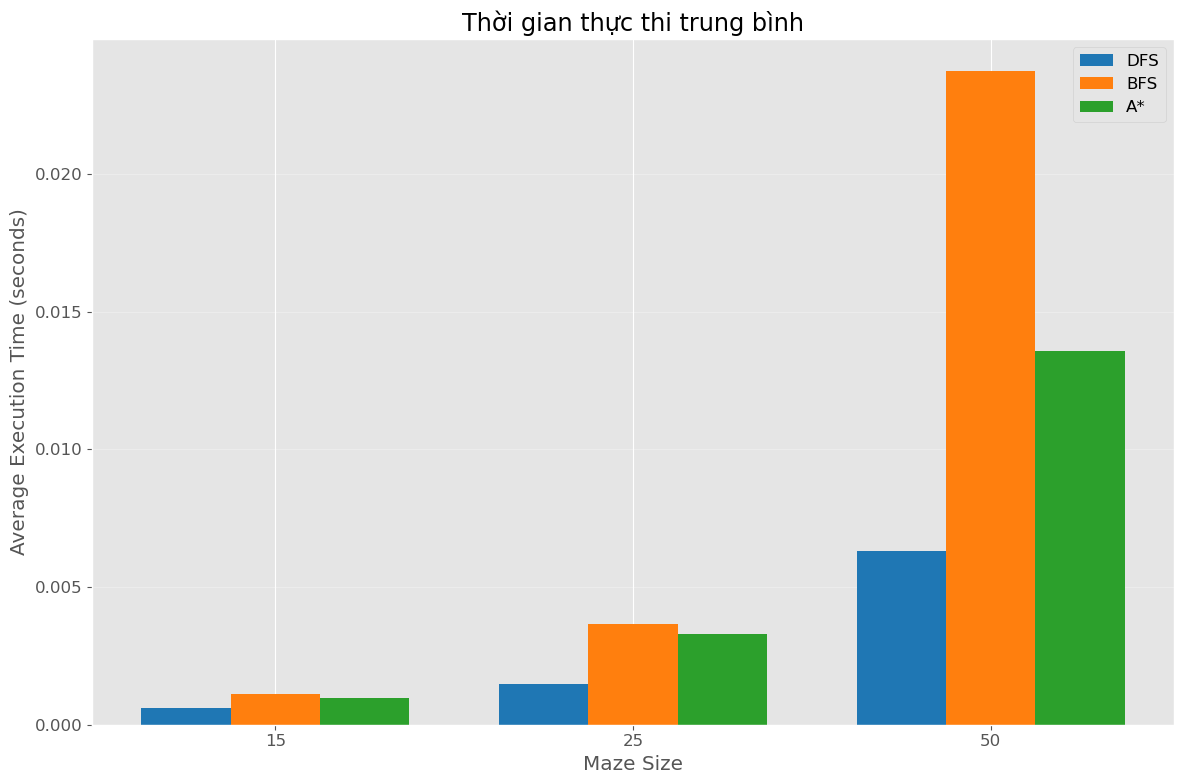

Visualizations created and saved to results directory.

Average execution time (s) by maze size:
   Maze Size  DFS Time  BFS Time   A* Time
0         15  0.000607  0.001133  0.000967
1         25  0.001490  0.003656  0.003297
2         50  0.006311  0.023718  0.013552


In [4]:
#!/usr/bin/env python3
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configure plot styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def analyze_execution_times():
    """
    Analyze and visualize the average execution times
    for each algorithm across different maze sizes.
    """
    # Check if the results file exists
    filepath = 'results/execution_times.csv'
    if not os.path.exists(filepath):
        print(f"Error: File {filepath} not found.")
        print("Please run the benchmarks first using data.py")
        return

    # Read the CSV file
    try:
        # First row contains headers
        df = pd.read_csv(filepath)
        
        # Rename columns for clarity if needed
        if len(df.columns) >= 5:  # Expected number of columns
            df.columns = ['Maze Size', 'Generation Algorithm', 'DFS Time', 'BFS Time', 
                          'A* Time']
        elif len(df.columns) >= 4:  # Expected number of columns when only using prim algorithm
            df.columns = ['Maze Size', 'DFS Time', 'BFS Time', 'A* Time']
        
        # Skip the header row if it was already in the CSV
        if df.iloc[0, 0] == 'Maze Size' or str(df.iloc[0, 0]).lower() == 'maze size':
            print("Found header row in data, skipping it.")
            df = df.iloc[1:].copy()
            
        # Convert numeric columns to appropriate types
        df['Maze Size'] = pd.to_numeric(df['Maze Size'], errors='coerce')
        for col in ['DFS Time', 'BFS Time', 'A* Time']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
        # Remove any rows with NaN values
        df = df.dropna()
        
        # Group by maze size to calculate average execution times
        grouped_by_size = df.groupby('Maze Size').mean(numeric_only=True).reset_index()
        
        # Create Bar Chart visualization
        plt.figure(figsize=(12, 8))
        width = 0.25  # width of the bars
        x = np.arange(len(grouped_by_size['Maze Size']))
        
        plt.bar(x - width, grouped_by_size['DFS Time'], width, label='DFS', color='#1f77b4')
        plt.bar(x, grouped_by_size['BFS Time'], width, label='BFS', color='#ff7f0e')
        plt.bar(x + width, grouped_by_size['A* Time'], width, label='A*', color='#2ca02c')
        
        plt.xlabel('Maze Size')
        plt.ylabel('Average Execution Time (seconds)')
        plt.title('Thời gian thực thi trung bình')
        plt.xticks(x, grouped_by_size['Maze Size'])
        plt.grid(True, axis='y', alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig('results/execution_times_bar_chart.png', dpi=300)
        plt.show()
        
        print("Visualizations created and saved to results directory.")
        print("\nAverage execution time (s) by maze size:")
        print(grouped_by_size[['Maze Size', 'DFS Time', 'BFS Time', 'A* Time']])
        
    except Exception as e:
        print(f"Error analyzing execution times: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    if not os.path.exists('results'):
        os.makedirs('results')
    analyze_execution_times()

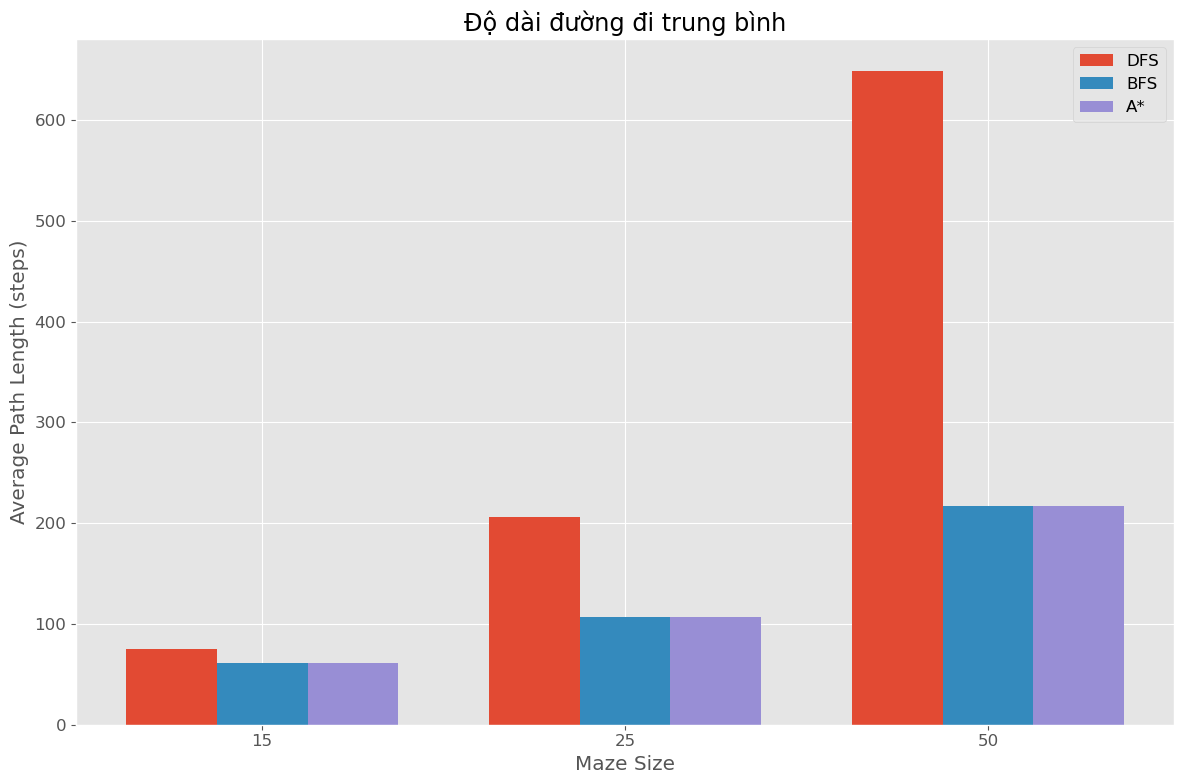

Visualization created and saved to results directory.

Average path length by maze size:
   Maze Size  DFS Length  BFS Length  A* Length
0         15        75.4        61.0       61.0
1         25       205.8       106.6      106.6
2         50       648.2       217.0      217.0


In [5]:
#!/usr/bin/env python3
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configure plot styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def analyze_path_lengths():
    """
    Analyze and visualize the average path lengths found
    by each algorithm across different maze sizes.
    """
    # Check if the results file exists
    filepath = 'results/path_lengths.csv'
    if not os.path.exists(filepath):
        print(f"Error: File {filepath} not found.")
        print("Please run the benchmarks first using data.py")
        return

    # Read the CSV file
    try:
        # First row contains headers
        df = pd.read_csv(filepath)
        
        # Rename columns for clarity if needed
        if len(df.columns) >= 5:  # Expected number of columns
            df.columns = ['Maze Size', 'Generation Algorithm', 'DFS Length', 'BFS Length', 
                          'A* Length']
        elif len(df.columns) >= 4:  # Expected number of columns when only using prim algorithm
            df.columns = ['Maze Size', 'DFS Length', 'BFS Length', 'A* Length']
        
        # Skip the header row if it was already in the CSV
        if df.iloc[0, 0] == 'Maze Size' or str(df.iloc[0, 0]).lower() == 'maze size':
            print("Found header row in data, skipping it.")
            df = df.iloc[1:].copy()
            
        # Convert numeric columns to appropriate types
        df['Maze Size'] = pd.to_numeric(df['Maze Size'], errors='coerce')
        for col in ['DFS Length', 'BFS Length', 'A* Length']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
        # Remove any rows with NaN values
        df = df.dropna()
        
        # Group by maze size to calculate average path lengths
        grouped_by_size = df.groupby('Maze Size').mean(numeric_only=True).reset_index()
        
        # Plot average path length by maze size
        plt.figure(figsize=(12, 8))
        width = 0.25  # width of the bars
        x = np.arange(len(grouped_by_size['Maze Size']))
        
        plt.bar(x - width, grouped_by_size['DFS Length'], width, label='DFS')
        plt.bar(x, grouped_by_size['BFS Length'], width, label='BFS')
        plt.bar(x + width, grouped_by_size['A* Length'], width, label='A*')
        
        plt.xlabel('Maze Size')
        plt.ylabel('Average Path Length (steps)')
        plt.title('Độ dài đường đi trung bình')
        plt.xticks(x, grouped_by_size['Maze Size'])
        plt.legend()
        plt.tight_layout()
        plt.savefig('results/path_lengths_visualization.png', dpi=300)
        plt.show()
        
        print("Visualization created and saved to results directory.")
        print("\nAverage path length by maze size:")
        print(grouped_by_size[['Maze Size', 'DFS Length', 'BFS Length', 'A* Length']])
        
    except Exception as e:
        print(f"Error analyzing path lengths: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    if not os.path.exists('results'):
        os.makedirs('results')
    analyze_path_lengths()

Trong chương trình của nhóm em, sau khi phân tích, có thể thấy `DFS` có thời gian thực thi nhanh hơn `A*` do một vài nguyên nhân sau:
- Độ phức tạp của cấu trúc dữ liệu:

    - `DFS`: Sử dụng stack và pop có độ phức tạp O(1), không cần sắp xếp hay duy trì thứ tự.
    - `A*`: Sử dụng priority queue: Thao tác push và pop có độ phức tạp O(log n), phải duy trì thứ tự ưu tiên sau mỗi thao tác
- Chi phí xử lý mỗi ô:
    - `DFS`: Chỉ push/pop và kiểm tra lân cận
    - `A*`: Phải tính toán F(n). Khi tìm thấy một đường đi tốt hơn đến một ô, phải cập nhật lại g_score và f_score cho điểm đó.
-> `A*` có thời gian thực thi lâu hơn `DFS`

### Cập nhật phân công, khối lượng công việc

| Thành viên | Tỉ lệ công việc  |
|-----------------|-----------------|
| NBV Linh    | 35%  | 
| NQ Anh   | 28%  | 
| HSA Minh   | 19%   |
| ĐT Đạt    | 18%| 
